In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

data =[]

for u in range (2019,2025):
  for y in range (1,53):
    url = f"https://snepmusique.com/les-tops/le-top-de-la-semaine/top-albums/?semaine={y}&annee={u}" # Use f-string to format url
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ranking = soup.find_all('div', class_=['rang', 'titre', 'artiste', 'editeur'])
    formatted_ranking = []

    i = 0
    while i < 200:
      rank = ranking[i].get_text(strip=True)
      i = i+1
      title = ranking[i].get_text(strip=True)
      i = i+1
      artist = ranking[i].get_text(strip=True)
      i = i+1
      editor = ranking[i].get_text(strip=True)
      i = i+1
      formatted_ranking.append(f"{rank} , {title} , {artist} , {editor}")
      data.append([rank , title , artist , editor,u,y])

df=pd.DataFrame(data,columns=['Rank','Album','Artist','Editor','Year','Week'])
df.columns = df.columns.str.strip()
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
df_save = df
df_save.to_csv('snep_albums.csv', index=False)
df.head()


,Rank,Album,Artist,Editor,Year,Week
0,1,MON PAYS C'EST L'AMOUR,JOHNNY HALLYDAY,WARNER,2019,1
1,2,LA ZONE EN PERSONNE,JUL,BELIEVE / D'OR ET DE PLATINE,2019,1
2,3,JEANNINE,LOMEPAL,IDOL / PINEALE PROD - GRAND MUSIQUE MANAGEMENT,2019,1
3,4,BROL,ANGÈLE,INITIAL ARTIST SERVICES / ANGELE VL RECORDS,2019,1
4,5,PHOENIX,SOPRANO,REC. 118,2019,1


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import urllib.parse

df['Album'] = df['Album'].str.strip().str.lower()
df['Artist'] = df['Artist'].str.strip().str.lower()

df['Tags'] = ''
for i in df.index:
  print(i)
  if df.loc[i, 'Tags'] != '':
    continue
  else :
    a = df.loc[i, 'Artist']
    b = df.loc[i, 'Album']
    if isinstance(b, str):
      c = b.strip().lower()
    else:
      print(f"Skipping index {i} due to invalid 'Album' value: {b}")
      continue
    a = urllib.parse.quote(a)
    b = urllib.parse.quote(b)
    url1 = f"http://ws.audioscrobbler.com/2.0/?method=album.getinfo&artist={a}&album={b}&api_key=1d0c327ec0a8172e6590639a3a976d2b&format=json"
    response1 = requests.get(url1)
    if response1.status_code == 200:
      try:
        json_data = response1.json()
        if 'album' in json_data and 'tags' in json_data['album'] and 'tag' in json_data['album']['tags']:
            tags_data = json_data['album']['tags']['tag']
            if isinstance(tags_data, list):
                genres = [tag['name'] for tag in tags_data]
            elif isinstance(tags_data, dict):
                genres = [tags_data['name']]
            else:
                genres = []
                df.loc[df['Album'] == c, 'Tags'] = 'Unknown'
        else:
            print("Error: Expected data not found in the response.")
            df.loc[df['Album'] == c, 'Tags'] = 'Unknown'
            genres = []
      except requests.exceptions.JSONDecodeError:
          print(f"Error decoding JSON for URL: {url1}")
          df.loc[df['Album'] == c, 'Tags'] = 'Unknown'
          genres = []
    else:
      print(f"Request failed with status code {response1.status_code} for URL: {url1}")
      df.loc[df['Album'] == c, 'Tags'] = 'Unknown'
      genres = []

    if genres != []:
        df.loc[df['Album'] == c, 'Tags'] = ' '.join(genres)
    else:
        df.loc[df['Album'] == c, 'Tags'] = 'Unknown'
        pass

df.loc[df['Artist'] == 'JUL', 'Tags'] = 'rap hip-hop french'

df.head()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
Error: Expected data not found in the response.
10951
10952
Error: Expected data not found in the response.
10953
10954
10955
10956
10957
10958
10959
10960
10961
Error: Expected data not found in the response.
10962
10963
10964
Error: Expected data not found in the response.
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
Error: Expected data not found in the response.
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
Request failed with status code 404 for URL: http://ws.audioscrobbler.com/2.0/?method=album.getinfo&artist=pink%

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,Album,Artist,Editor,Year,Week,Tags
0,0,0,0,1,mon pays c'est l'amour,johnny hallyday,WARNER,2019,1,chanson francaise french rock rock francais jo...
1,1,1,1,2,la zone en personne,jul,BELIEVE / D'OR ET DE PLATINE,2019,1,Unknown
2,2,2,2,3,jeannine,lomepal,IDOL / PINEALE PROD - GRAND MUSIQUE MANAGEMENT,2019,1,hip-hop french rap underground rap rap francais
3,3,3,3,4,brol,angèle,INITIAL ARTIST SERVICES / ANGELE VL RECORDS,2019,1,french 2018 pop france queen
4,4,4,4,5,phoenix,soprano,REC. 118,2019,1,albums rap french hip-hop rap francais


In [ ]:
from google.colab import drive
drive.mount('drive',force_remount=True)
df_save = df
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

Mounted at drive


In [2]:
import pandas as pd
from google.colab import drive

df=[]
drive.mount('drive',force_remount=True)
df = pd.read_csv('drive/My Drive/data.csv')



df.head()


Mounted at drive


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,Album,Artist,Editor,Year,Week,Tags
0,0,0,0,1,mon pays c'est l'amour,JOHNNY HALLYDAY,WARNER,2019,1,chanson francaise french rock rock francais jo...
1,1,1,1,2,la zone en personne,JUL,BELIEVE / D'OR ET DE PLATINE,2019,1,rap hip-hop french
2,2,2,2,3,jeannine,LOMEPAL,IDOL / PINEALE PROD - GRAND MUSIQUE MANAGEMENT,2019,1,hip-hop french rap underground rap rap francais
3,3,3,3,4,brol,ANGÈLE,INITIAL ARTIST SERVICES / ANGELE VL RECORDS,2019,1,french 2018 pop france queen
4,4,4,4,5,phoenix,SOPRANO,REC. 118,2019,1,albums rap french hip-hop rap francais


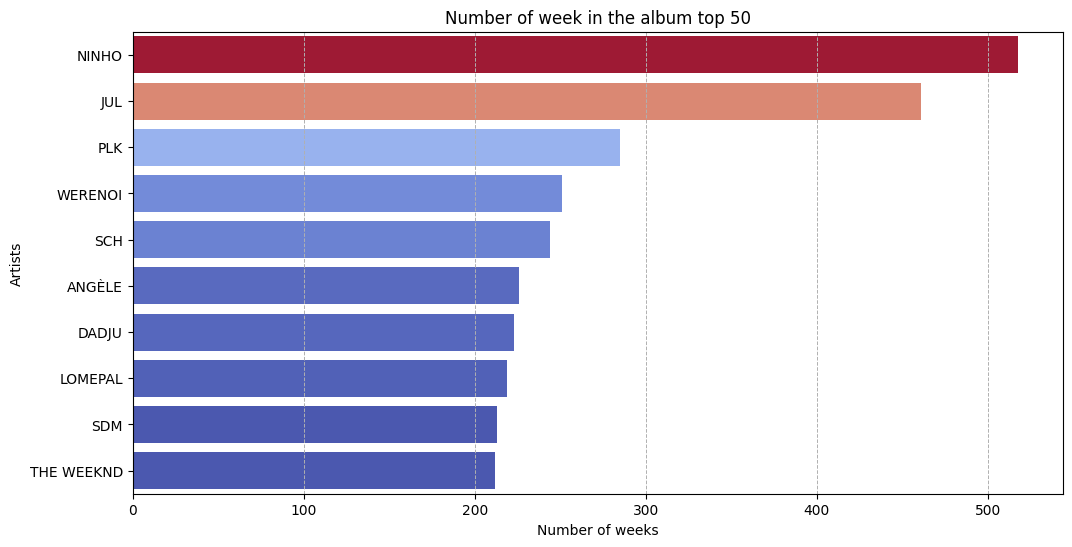

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

artist_counts = df['Artist'].value_counts()
top_10_artists = artist_counts.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_10_artists.values, y=top_10_artists.index, palette='coolwarm', hue=top_10_artists.values, legend=False)
plt.title('Number of week in the album top 50')
plt.xlabel('Number of weeks')
plt.ylabel('Artists')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)

plt.show()

In [43]:
df_distinct_weeks = df.drop_duplicates(subset=['Artist', 'Year','Week'])
weeks_per_artist = df_distinct_weeks['Artist'].value_counts()
total_weeks = 52*6
percentage = (weeks_per_artist / total_weeks) * 100

weeks_per_artist.head(10)
result_df = pd.DataFrame({
    'Artist': weeks_per_artist.index,
    'Weeks': weeks_per_artist.values,
    'Percentage': percentage.values.round(2)})

mean = result_df['Weeks'].mean().round()
week1 = result_df[result_df['Weeks']<mean].count()

print(f'On average, an album stays {mean} weeks in the top 50 once it reached it. However, {week1.iloc[0]} albums, (on a total of {result_df.index.size}) have stayed on the top less than {mean} weeks')

result_df.head()

On average, an album stays 15.0 weeks in the top 50 once it reached it. However, 750 albums, (on a total of 949) have stayed on the top less than 15.0 weeks


,Artist,Weeks,Percentage
0,JUL,305,97.76
1,NINHO,302,96.79
2,PLK,256,82.05
3,ANGÈLE,225,72.12
4,SCH,208,66.67


In [47]:
artist_data = {'Artist': [], 'Albums': []}
for artist in top_10_artists.index:
    artist_data['Artist'].append(artist)
    artist_data['Albums'].append(df[df['Artist'] == artist]['Album'].nunique())



artist_data_df = pd.DataFrame(artist_data)
print(artist_data_df)


       Artist  Albums
0       NINHO       6
1         JUL      16
2         PLK       7
3     WERENOI       5
4         SCH       6
5      ANGÈLE       4
6       DADJU       4
7     LOMEPAL       7
8         SDM       4
9  THE WEEKND       3


,count
french,6599
rap,5631
pop,4757
rock,2680
hip-hop,2645
france,1232
rnb,1206
synthpop,871
francaise,788
chanson,783


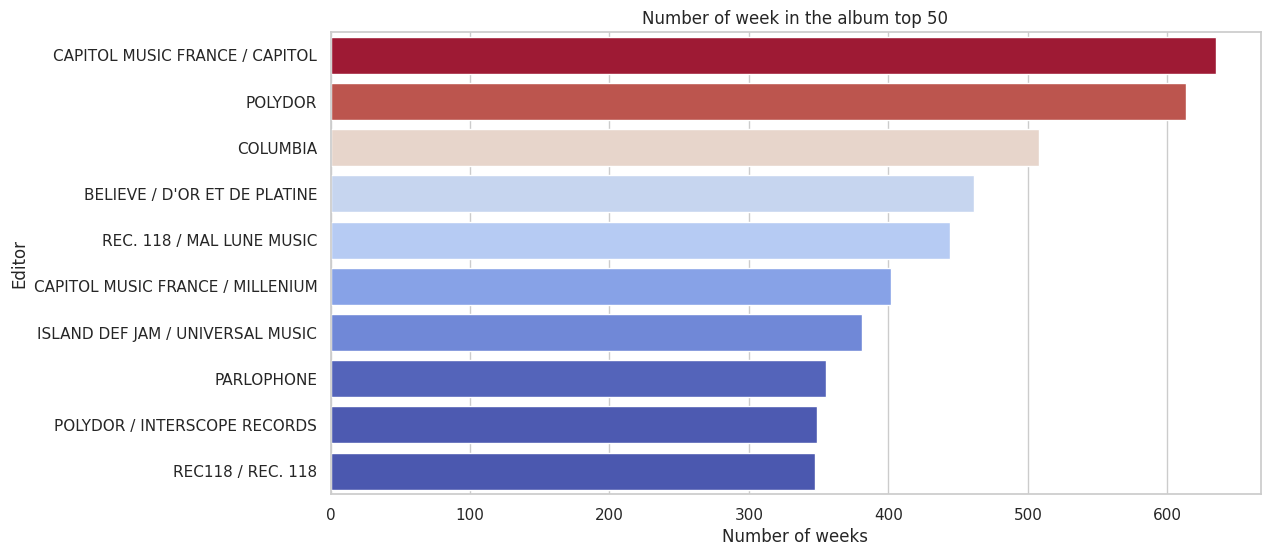

In [50]:
editors_counts = df['Editor'].value_counts()

top_10_editors = editors_counts.head(10)


plt.figure(figsize=(12,6))
sns.barplot(x=top_10_editors.values, y=top_10_editors.index, palette='coolwarm', hue=top_10_editors.values, legend=False)
plt.title('Number of week in the album top 50')
plt.xlabel('Number of weeks')
plt.ylabel('Editor')
fontsize= 'big'
font = {'fontname':'Helvetica'}
plt.show()

<ipython-input-53-4e33c97a0267>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.head(10).index, y=tag_counts.head(10), palette='coolwarm')


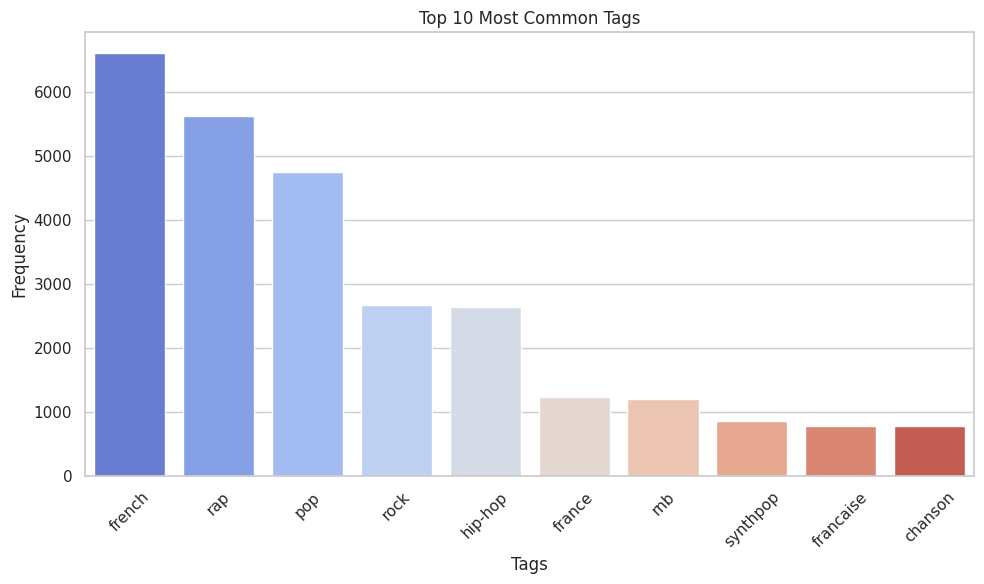

In [53]:
tags_series = df['Tags'].dropna().str.split(' ', expand=True).stack()
tags_series_filtered = tags_series[(tags_series != 'Unknown') & (tags_series != 'albums')&(tags_series != 'hop')&(tags_series != 'hip')]
tag_counts = tags_series_filtered.value_counts()

import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.head(10).index, y=tag_counts.head(10), palette='coolwarm')

plt.title('Top 10 Most Common Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
